In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import roc_curve, auc

### Function to generate confusion matrix

In [0]:
def confusionMatrix(predicted, actual, threshold):
  if len(predicted) != len(actual):
    return -1
  tp = 0.0
  fp = 0.0
  tn = 0.0
  fn = 0.0
  for i in range(len(actual)):
    if actual[i] > 0.5: #labels that are 1.0 (denote inauthentic bank notes)
      if predicted[i] > threshold:
        tp += 1.0 
      else:
        fn += 1.0 
    else: #labels that are 0.0 (denote authentic bank notes)
      if predicted[i] < threshold:
        tn += 1.0
      else:
        fp += 1.0 
  rtn = [tp, fn, fp, tn]
  return rtn

In [0]:
url = 'https://raw.githubusercontent.com/penthaapatel/BankNoteAuthentication/master/data_banknote_authentication.csv'

### Parse banknote data into a pandas dataframe

In [0]:
df = pd.read_csv(url, header=None)

In [0]:
df.columns = ["variance","skewness","kurtosis","entropy","output"]

In [6]:
df.head()

,variance,skewness,kurtosis,entropy,output
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [7]:
df.shape

(1372, 5)

In [8]:
df.describe()

,variance,skewness,kurtosis,entropy,output
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


### Data analysis

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


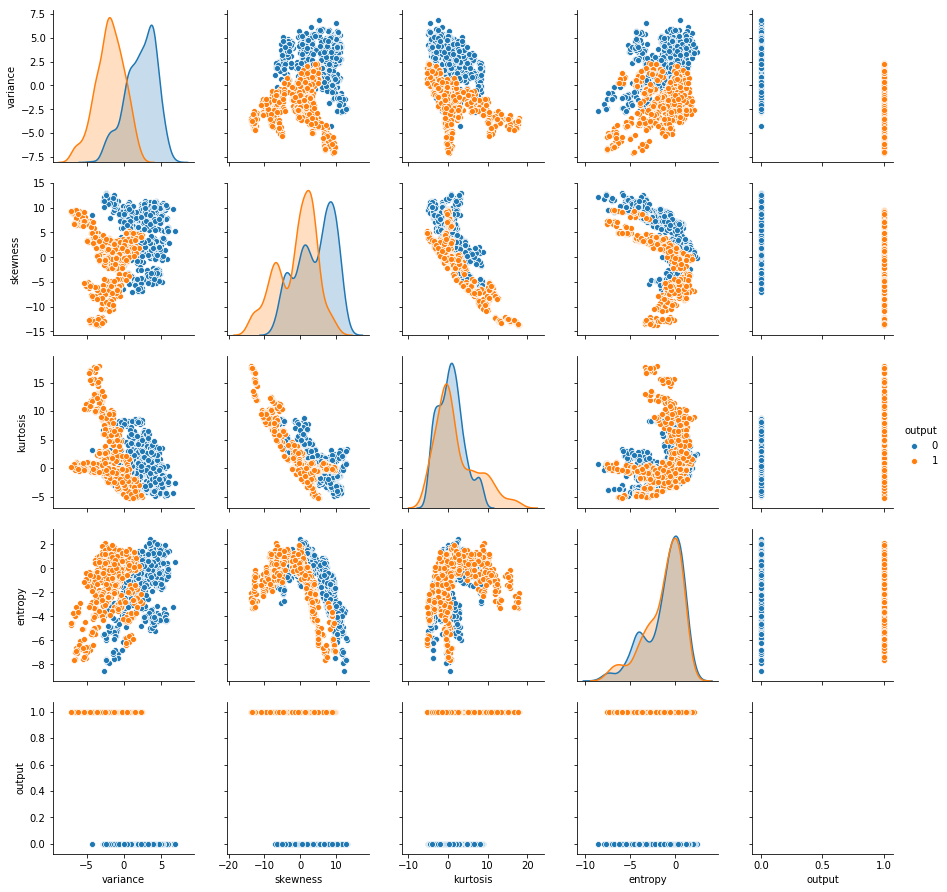

In [9]:
sns.pairplot(df, hue='output')

### Ordinary Least Square Regression (OLS)

In [0]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [12]:
banknote_model = ols("output ~ variance + skewness + kurtosis + entropy", data=df).fit()
banknote_model_summary = banknote_model.summary()
print(banknote_model_summary)

                            OLS Regression Results                            
Dep. Variable:                 output   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     2187.
Date:                Tue, 22 Oct 2019   Prob (F-statistic):               0.00
Time:                        14:09:53   Log-Likelihood:                 385.64
No. Observations:                1372   AIC:                            -761.3
Df Residuals:                    1367   BIC:                            -735.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7980      0.008    103.927      0.0

### Partial Regression Plots

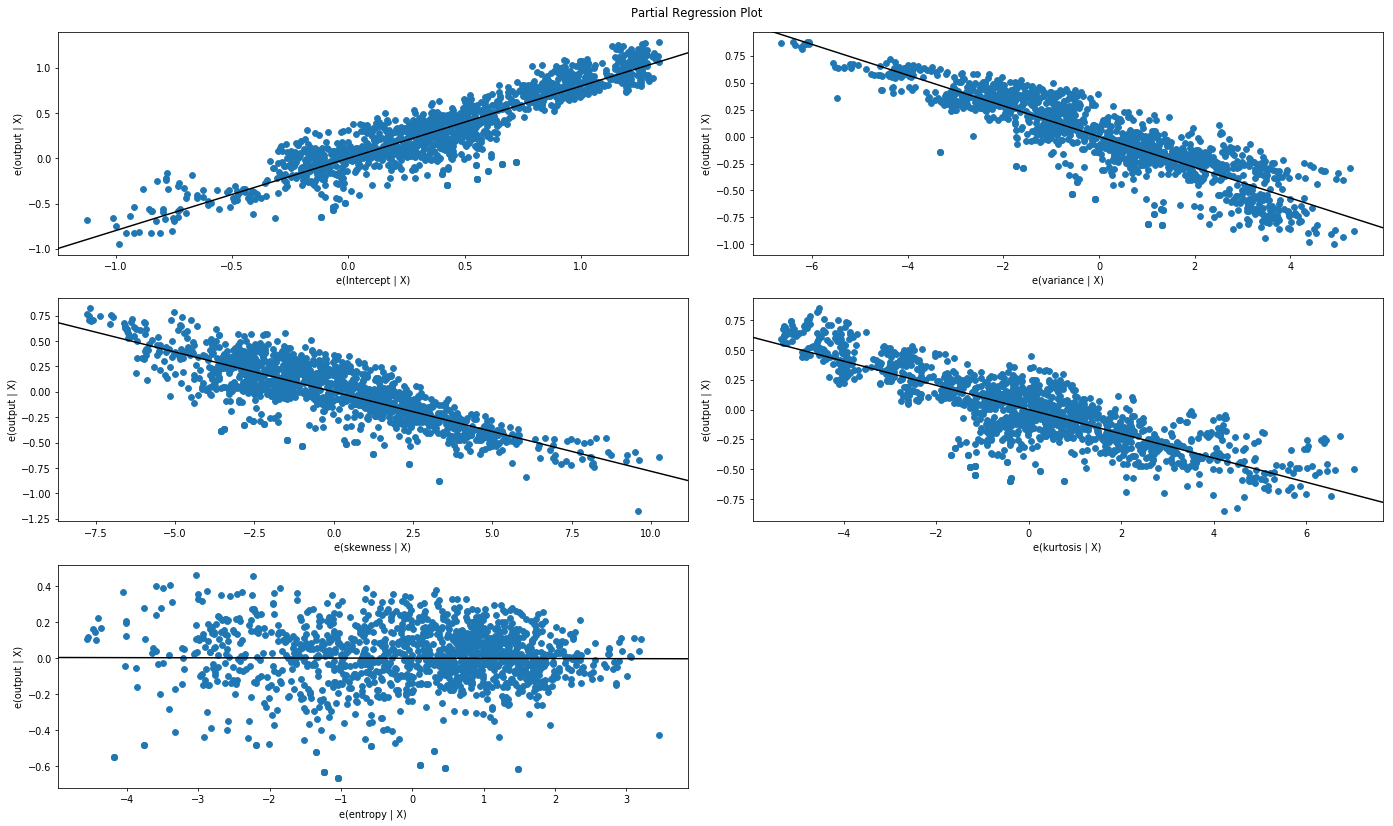

In [13]:
#Partial Regression Plots
fig = plt.figure(figsize=(20,12), dpi=70)
fig = sm.graphics.plot_partregress_grid(banknote_model, fig=fig)

### Prepare the data
Break the data (attributes and labels) into two subsets: a training set and a test set.

In [0]:
data_copy = df.copy()

In [0]:
train_set = data_copy.sample(frac=0.75)
test_set = data_copy.drop(train_set.index)
train_set_labels = train_set.pop('output')
test_set_labels = test_set.pop('output')

In [0]:
train = np.array(train_set)
test = np.array(test_set)
train_labels = np.array(train_set_labels)
test_labels = np.array(test_set_labels)

In [17]:
train.shape

(1029, 4)

In [18]:
test.shape

(343, 4)

In [19]:
train_labels.shape

(1029,)

In [20]:
test_labels.shape

(343,)

### Create the model
Using Linear Regression

In [21]:
model = linear_model.LinearRegression()
model.fit(train,train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Train the model
Train the classifier using training set

In [0]:
trainPredictions = model.predict(train)

In [23]:
df1 = pd.DataFrame({'Actual': train_labels, 'Predicted': trainPredictions.flatten()})
df1

,Actual,Predicted
0,0,0.074631
1,1,0.955457
2,1,1.153353
3,1,0.877786
4,1,0.907919
5,0,-0.051345
6,0,0.042639
7,0,0.030029
8,0,0.037120
9,0,0.010732


### Generate confusion matrix for in-sample data

In [0]:
#A list of 50 evenly spaced threshold values between 0 and 1
t = np.linspace(0,1,50)

In [25]:
t

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

In [26]:
for threshold in t:  
  confusionMatTrain = confusionMatrix(trainPredictions, train_labels, threshold)
  tp = confusionMatTrain[0]
  fn = confusionMatTrain[1]
  fp = confusionMatTrain[2]
  tn = confusionMatTrain[3]
  print("For Threshold value = "+str(threshold))
  print("tp = " + str(tp) + "\tfn = " + str(fn) + "\n" + "fp = " + str(fp) + "\ttn = " + str(tn))
  print("Error Rate = "+str((fp+fn)/(tp+fn+fp+tn)) + '\n')

For Threshold value = 0.0
tp = 458.0	fn = 0.0
fp = 349.0	tn = 222.0
Error Rate = 0.3391642371234208

For Threshold value = 0.02040816326530612
tp = 458.0	fn = 0.0
fp = 326.0	tn = 245.0
Error Rate = 0.31681243926141883

For Threshold value = 0.04081632653061224
tp = 458.0	fn = 0.0
fp = 284.0	tn = 287.0
Error Rate = 0.2759961127308066

For Threshold value = 0.061224489795918366
tp = 458.0	fn = 0.0
fp = 250.0	tn = 321.0
Error Rate = 0.24295432458697766

For Threshold value = 0.08163265306122448
tp = 458.0	fn = 0.0
fp = 224.0	tn = 347.0
Error Rate = 0.21768707482993196

For Threshold value = 0.1020408163265306
tp = 458.0	fn = 0.0
fp = 199.0	tn = 372.0
Error Rate = 0.1933916423712342

For Threshold value = 0.12244897959183673
tp = 458.0	fn = 0.0
fp = 184.0	tn = 387.0
Error Rate = 0.17881438289601556

For Threshold value = 0.14285714285714285
tp = 458.0	fn = 0.0
fp = 151.0	tn = 420.0
Error Rate = 0.1467444120505345

For Threshold value = 0.16326530612244897
tp = 458.0	fn = 0.0
fp = 131.0	tn 

### Evaluate the model
Evaluate using test set.

In [0]:
testPredictions = model.predict(test)

In [28]:
df2 = pd.DataFrame({'Actual': test_labels, 'Predicted': testPredictions.flatten()})
df2

,Actual,Predicted
0,0,-0.114419
1,0,-0.242947
2,0,0.169359
3,0,0.162534
4,0,-0.069302
5,0,-0.463544
6,0,0.350816
7,0,-0.031518
8,0,-0.010361
9,0,0.043958


### Scatter plot of actual vs predicted

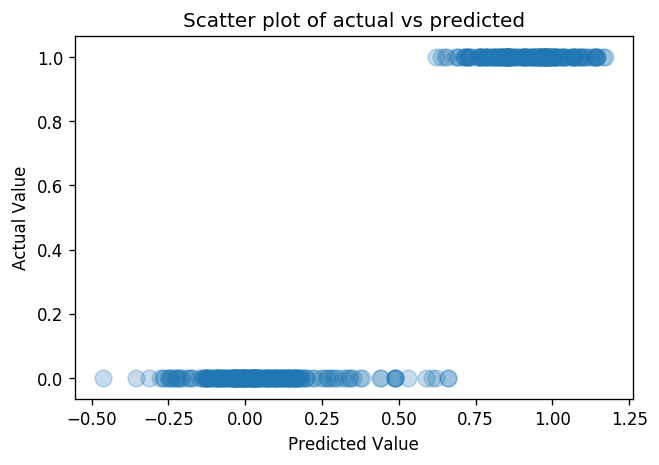

In [31]:
plt.figure(dpi=120)
plt.scatter(model.predict(test), test_labels, s=100, alpha=0.25)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title("Scatter plot of actual vs predicted")
plt.show()

### Generate confusion matrix for test data and calculate misclassification(error) rate 

In [32]:
errors = []
for threshold in t:  
  conMatTest = confusionMatrix(testPredictions, test_labels, threshold)
  tp = conMatTest[0]
  fn = conMatTest[1]
  fp = conMatTest[2]
  tn = conMatTest[3]
  print("For Threshold value = "+str(threshold))
  print("tp = " + str(tp) + "\tfn = " + str(fn) + "\n" + "fp = " + str(fp) + "\ttn = " + str(tn))
  #Misclassification Rate: Overall, how often is it wrong?
  err = (fp+fn)/(tp+fn+fp+tn)
  errors.append(err)
  print("Error Rate = "+str(err) + '\n')

For Threshold value = 0.0
tp = 152.0	fn = 0.0
fp = 109.0	tn = 82.0
Error Rate = 0.3177842565597668

For Threshold value = 0.02040816326530612
tp = 152.0	fn = 0.0
fp = 100.0	tn = 91.0
Error Rate = 0.2915451895043732

For Threshold value = 0.04081632653061224
tp = 152.0	fn = 0.0
fp = 84.0	tn = 107.0
Error Rate = 0.24489795918367346

For Threshold value = 0.061224489795918366
tp = 152.0	fn = 0.0
fp = 79.0	tn = 112.0
Error Rate = 0.2303206997084548

For Threshold value = 0.08163265306122448
tp = 152.0	fn = 0.0
fp = 70.0	tn = 121.0
Error Rate = 0.20408163265306123

For Threshold value = 0.1020408163265306
tp = 152.0	fn = 0.0
fp = 63.0	tn = 128.0
Error Rate = 0.1836734693877551

For Threshold value = 0.12244897959183673
tp = 152.0	fn = 0.0
fp = 57.0	tn = 134.0
Error Rate = 0.1661807580174927

For Threshold value = 0.14285714285714285
tp = 152.0	fn = 0.0
fp = 49.0	tn = 142.0
Error Rate = 0.14285714285714285

For Threshold value = 0.16326530612244897
tp = 152.0	fn = 0.0
fp = 40.0	tn = 151.0
Er

Text(0, 0.5, 'Error rate')

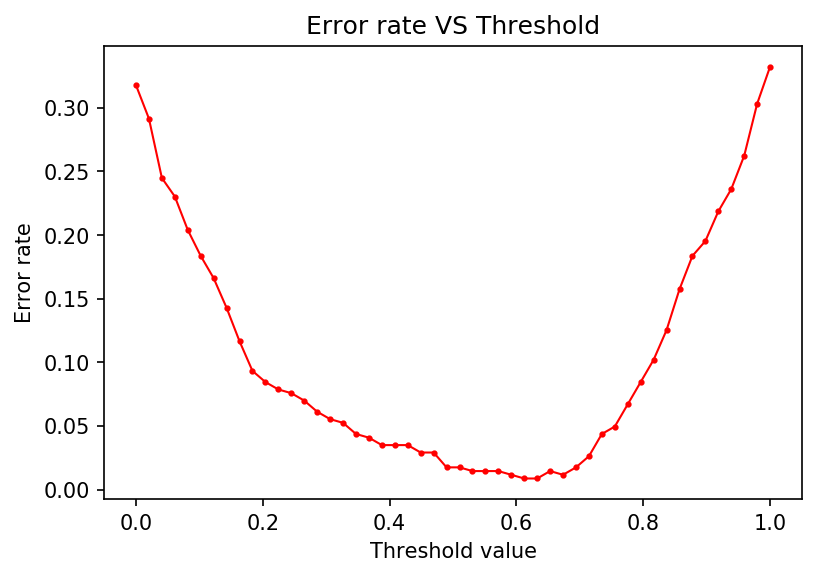

In [33]:
plt.figure(dpi=150)
plt.plot(t,errors,'-ro', linewidth=1, markersize=2)
plt.title('Error rate VS Threshold')
plt.xlabel('Threshold value')
plt.ylabel('Error rate')

### Calculate area under ROC for in-sample data

AUC for in-sample ROC curve: 0.999637


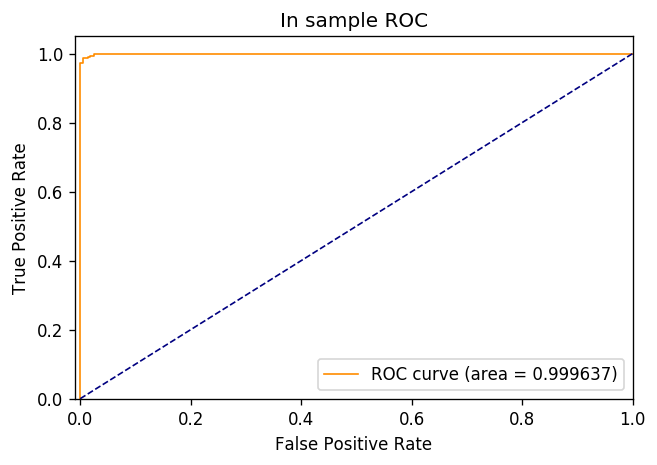

In [34]:
fpr, tpr, thresholds = roc_curve(train_labels,trainPredictions)
roc_auc = auc(fpr, tpr)
print( 'AUC for in-sample ROC curve: %f' % roc_auc)
plt.figure(dpi=120)
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('In sample ROC')
plt.legend(loc="lower right")
plt.show()

### Calculate area under ROC for out-sample data

AUC for out-of-sample ROC curve: 0.999724


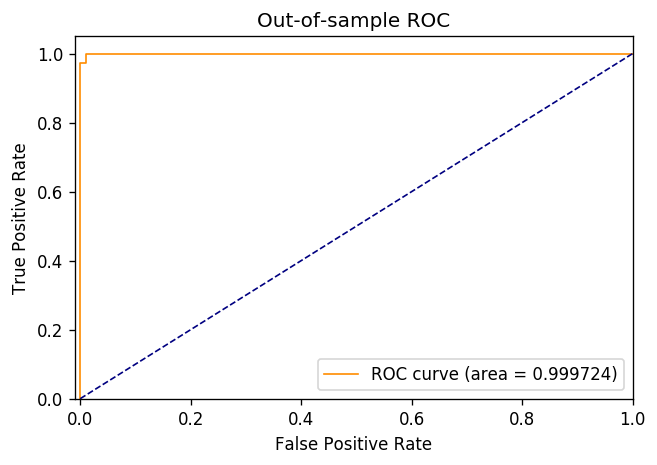

In [35]:
fpr, tpr, thresholds = roc_curve(test_labels,testPredictions)
roc_auc = auc(fpr, tpr)
print( 'AUC for out-of-sample ROC curve: %f' % roc_auc)
plt.figure(dpi=120)
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Out-of-sample ROC')
plt.legend(loc="lower right")
plt.show()